# Atividade Basica

Passeio aleat√≥rio (implementa√ß√£o b√°sica). Considere um passeio aleat√≥rio unidimensional, onde a cada instante de tempo o caminhante d√° um passo uma unidade para a direita ou para a esquerda com probabilidades p e 1 ‚àí p , respectivamente. O passeio termina depois de N = 1000 passos. Fa√ßa um gr√°fico da posi√ß√£o do caminhante em fun√ß√£o do n√∫mero de passos (que representa o tempo). Use p = 0.5 e p = 0.8 . Implemente na forma de uma fun√ß√£o que receba como argumento o n√∫mero de passos N e a probabilidade p , e retorne um array com a posi√ß√£o do caminhante em cada passo.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def random_walk(n,p):
    
    rng = np.random.default_rng()

    lista = rng.choice(a=[-1,1],size=n,p=[1-p, p])
    caminho = np.cumsum(lista)
    tempo = np.arange(0,n,1)
    return caminho, tempo




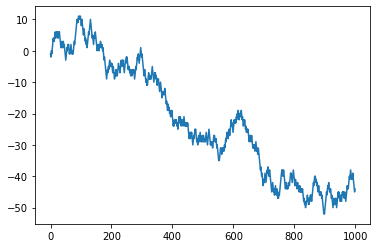

In [2]:

y,x = random_walk(1000,0.5)
plt.plot(x,y)

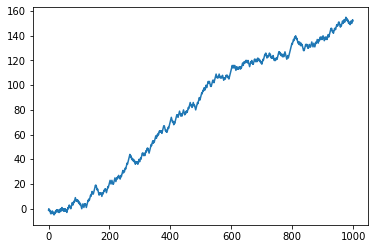

In [3]:

y,x = random_walk(1000,0.6)

plt.plot(x,y)

Passeio aleat√≥rio (repeti√ß√£o). Rode o c√≥digo acima 100 vezes para um valor fixo p e fa√ßa o gr√°fico conjunto de todos os passeios. Use p = 0.5 e p = 0.8 . O que observa?

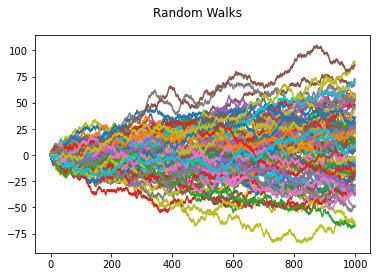

In [4]:
fig , ax = plt.subplots()
for i in range(100):
    y,x = random_walk(1000,0.5)
    ax.plot(x,y)
fig.suptitle('Random Walks')
plt.show()

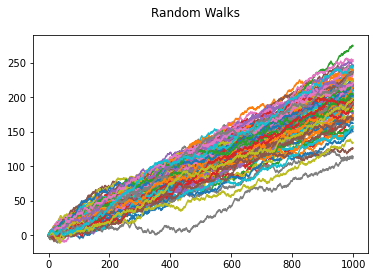

In [5]:
fig , ax = plt.subplots()
for i in range(100):
    y,x = random_walk(1000,0.6)
    ax.plot(x,y)
fig.suptitle('Random Walks')
plt.show()

# Atividade Intermediaria

Passeio aleat√≥rio (m√©dias). Calcule a m√©dia e o desvio padr√£o da posi√ß√£o do caminhante em fun√ß√£o do n√∫mero de passos. Fa√ßa um gr√°fico da m√©dia e do desvio padr√£o em fun√ß√£o dos passos. Use p = 0.5 e p = 0.8 .

In [6]:
import numpy as np
def desvio(X):

    m = len(X)
    x = np.median(X ,axis=0)
    deltax = []
    for i in range(m):
        deltax.append((x-X[i])**2)
    desvio = (np.sum(deltax,axis=0)/(m-1))**(1/2)
    
    return np.array(desvio) , np.array(x)



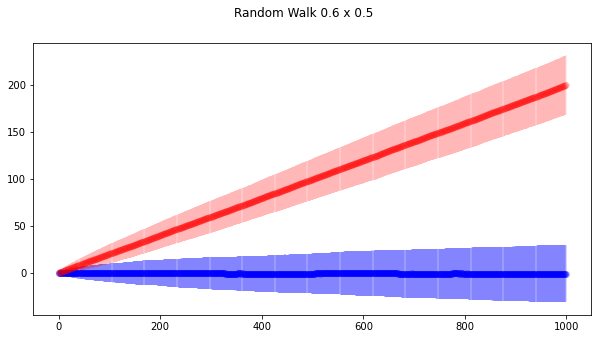

In [7]:
import matplotlib.pyplot as plt
import numpy as np
Y1 = []
Y2 = []

x = np.arange(0,1000,1)
for i in range(1000):
    y2 , _ = random_walk(1000,0.6)
    Y2.append(y2)

for i in range(1000):
    y1 , _ = random_walk(1000,0.5)
    Y1.append(y1)


#desvioy2 , y2 = desvio(Y2)

#desvioy1 , y1 = desvio(Y1)
desvioy1 = np.std(Y1,axis=0)
desvioy2 = np.std(Y2,axis=0)
y1 = np.mean(Y1,axis=0)
y2 = np.mean(Y2,axis=0)


fig3 , ax3 = plt.subplots(figsize=(10,5))

ax3.errorbar(x=x,y=y1,yerr=desvioy1,xerr=0,alpha=0.2,fmt='o',color ='Blue')

ax3.errorbar(x=x,y=y2,yerr=desvioy2,xerr=0,alpha=0.1,fmt='o',color ='Red')

fig3.suptitle('Random Walk 0.6 x 0.5')
plt.show()

Passeio aleat√≥rio (histograma 1). Usando os dados do exerc√≠cio 2, fa√ßa histogramas da posi√ß√£o do caminhante no inicio, no meio e no final do passeio. Plote os 3 histogramas no mesmo gr√°fico. Veja se o resultado condiz com o observado no exerc√≠cio 2.

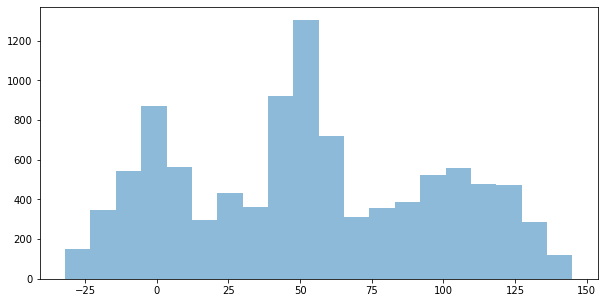

In [15]:
fig4 , ax4 = plt.subplots(figsize=(10,5))
y4 = random_walk(10000,0.5)[0]
ax4.hist(y4, bins=20, alpha=0.5)
#ax4.hist(y2, bins=30, alpha=0.5, color='red', label='p=0.6')


plt.show()


# Atividade avan√ßada

Passeio aleat√≥rio (histograma). Usando os dados do exerc√≠cio 2, fa√ßa um histograma da posi√ß√£o do caminhante em cada passo. Fa√ßa um gr√°fico de mapa de cores da evolu√ß√£o do histograma usando plt.imshow, plt.pcolormesh, ou tente fazer gr√°ficos 3D. Se optar por fazer gr√°ficos 3D, recomendo usar a biblioteca plotly, pois gr√°ficos 3D no matplotlib n√£o ficam bons.

In [9]:
import plotly.graph_objects as go
Y= []
for i in range(10):
    y,x= random_walk(100,0.6)
    Y.append(y)
Y= np.array(Y)
print(len(Y))
Y2 = np.(Y)
print(len(Y2))

import plotly.graph_objects as go
import numpy as np

# Create figure
#fig = go.Figure(data=[go.Surface(z=Z1)])
fig = go.Figure()

# Add traces, one for each slider step
for step in range(len(Y[0])):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="ùúà = " + str(step),
            x = x,
            y = np.traspose(Y)
        )
    )

# Make 10th trace visible
fig.data[len(Y)].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()


SyntaxError: invalid syntax (2211039991.py, line 8)

In [ ]:
import plotly.graph_objects as go
Z= []
for i in range(100):
    x = random_walk(1000,0.6)
    Z.append(x)

#fig = go.Figure(data=[go.Surface(z=Z1)])
#fig.show()